In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
x=df.iloc[:,:-1]
y=df['Type']

In [7]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.2,random_state=1)

In [10]:
def predict(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)

  print(model.score(xtrain,ytrain))
  print(model.score(xtest,ytest))

In [11]:
predict(KNeighborsClassifier(n_neighbors=5))

0.6666666666666666
0.5872093023255814


In [12]:
trainac=[]
testac=[]

for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred=knn.predict(xtest)
  trainac.append(knn.score(xtrain,ytrain))
  testac.append(knn.score(xtest,ytest))

In [13]:
trainac

[1.0,
 0.8333333333333334,
 0.8095238095238095,
 0.7142857142857143,
 0.6666666666666666,
 0.6666666666666666,
 0.7142857142857143,
 0.7380952380952381,
 0.7142857142857143,
 0.6904761904761905,
 0.6904761904761905,
 0.6190476190476191,
 0.6190476190476191,
 0.5476190476190477,
 0.5238095238095238,
 0.5238095238095238,
 0.42857142857142855,
 0.5238095238095238,
 0.5,
 0.35714285714285715,
 0.4523809523809524,
 0.40476190476190477,
 0.5952380952380952,
 0.5714285714285714,
 0.5476190476190477,
 0.5238095238095238,
 0.5476190476190477,
 0.5,
 0.5238095238095238]

In [14]:
testac

[0.5872093023255814,
 0.5930232558139535,
 0.6162790697674418,
 0.6046511627906976,
 0.5872093023255814,
 0.6046511627906976,
 0.5872093023255814,
 0.563953488372093,
 0.563953488372093,
 0.5174418604651163,
 0.5,
 0.43023255813953487,
 0.4186046511627907,
 0.42441860465116277,
 0.4069767441860465,
 0.4069767441860465,
 0.3953488372093023,
 0.4011627906976744,
 0.4011627906976744,
 0.3546511627906977,
 0.3372093023255814,
 0.3081395348837209,
 0.36627906976744184,
 0.37790697674418605,
 0.36627906976744184,
 0.37790697674418605,
 0.36627906976744184,
 0.3546511627906977,
 0.3546511627906977]

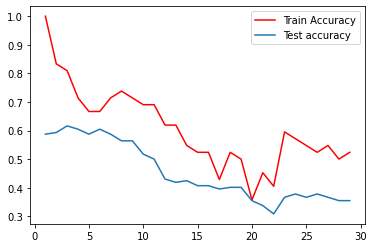

In [15]:
plt.plot(range(1,30),trainac,color='red',label='Train Accuracy')
plt.plot(range(1,30),testac,label='Test accuracy')
plt.xlabel=('K-value')
plt.ylabel=('Accuracy')
plt.legend()

In [16]:
predict(KNeighborsClassifier(n_neighbors=20))

0.35714285714285715
0.3546511627906977


In [17]:
#zoo Data

In [18]:
df1=pd.read_csv('Zoo.csv')
df1

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [19]:
df1['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [20]:
df1.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [21]:
df1['type'].nunique()

7

In [22]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [23]:
df1['breathes'].mean()

0.7920792079207921

In [24]:
df1['breathes'].replace(0,df1['breathes'].mean())

0      1.000000
1      1.000000
2      0.792079
3      1.000000
4      1.000000
         ...   
96     1.000000
97     1.000000
98     1.000000
99     1.000000
100    1.000000
Name: breathes, Length: 101, dtype: float64

In [25]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Histogram of Classes')

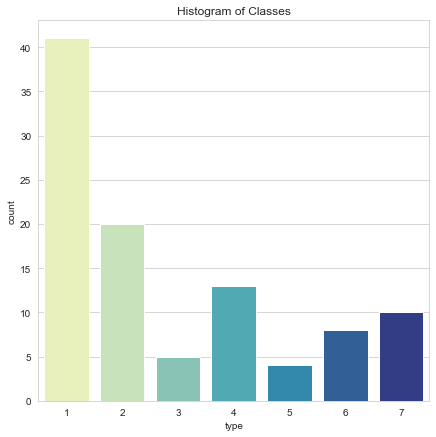

In [26]:
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(df1['type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

In [27]:
df1.drop(columns=['animal name'],inplace=True)


In [28]:
x=df1.iloc[:,:-1]
y=df1['type']

In [29]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [30]:
from sklearn.model_selection import train_test_split 

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=1)

In [32]:
def predict(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)

  print(model.score(xtrain,ytrain))
  print(model.score(xtest,ytest))
  print(classification_report(ytest,ypred))

In [33]:
predict(KNeighborsClassifier(n_neighbors=5))

0.96
0.8846153846153846
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.71      1.00      0.83         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.88        26
   macro avg       0.63      0.67      0.63        26
weighted avg       0.84      0.88      0.85        26



In [34]:
trainac=[]
testac=[]


for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred=knn.predict(xtest)
  trainac.append(knn.score(xtrain,ytrain))
  testac.append(knn.score(xtest,ytest))

In [35]:
trainac

[1.0,
 0.9466666666666667,
 0.9466666666666667,
 0.96,
 0.96,
 0.9333333333333333,
 0.92,
 0.9066666666666666,
 0.88,
 0.88,
 0.8933333333333333,
 0.8933333333333333,
 0.88,
 0.88,
 0.88,
 0.8933333333333333,
 0.8933333333333333,
 0.88,
 0.88,
 0.8533333333333334,
 0.8266666666666667,
 0.8,
 0.7866666666666666,
 0.7866666666666666,
 0.7733333333333333,
 0.76,
 0.76,
 0.7466666666666667,
 0.7466666666666667]

In [36]:
testac

[0.9615384615384616,
 0.8846153846153846,
 0.9230769230769231,
 0.9615384615384616,
 0.8846153846153846,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.8076923076923077,
 0.8076923076923077,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.7692307692307693,
 0.7692307692307693,
 0.7307692307692307,
 0.7307692307692307]

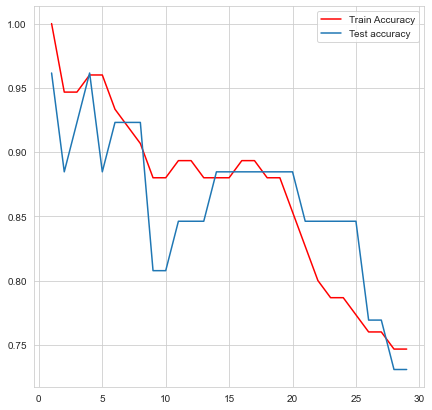

In [37]:
plt.plot(range(1,30),trainac,color='red',label='Train Accuracy')
plt.plot(range(1,30),testac,label='Test accuracy')
plt.xlabel=('K-value')
plt.ylabel=('Accuracy')
plt.legend()

In [38]:
predict(KNeighborsClassifier(n_neighbors=28))

0.7466666666666667
0.7307692307692307
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.71      1.00      0.83         5
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.73        26
   macro avg       0.30      0.43      0.35        26
weighted avg       0.57      0.73      0.64        26

